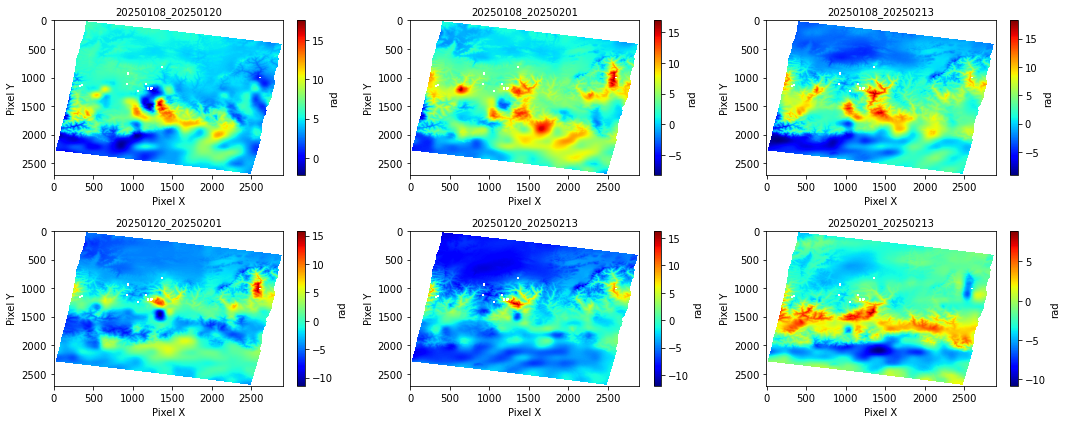

Saved all GACOS correction maps to GACOS_all_048D_06252_131313.png


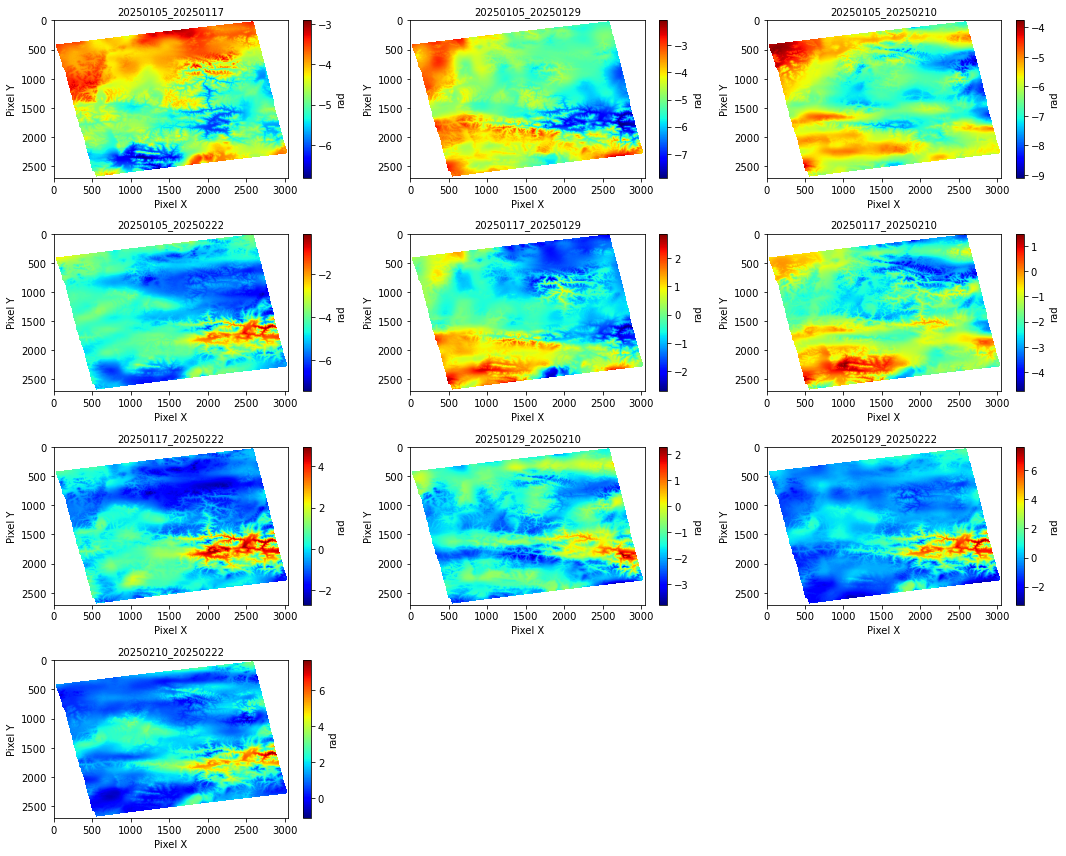

Saved all GACOS correction maps to GACOS_all_012A_06041_131313.png


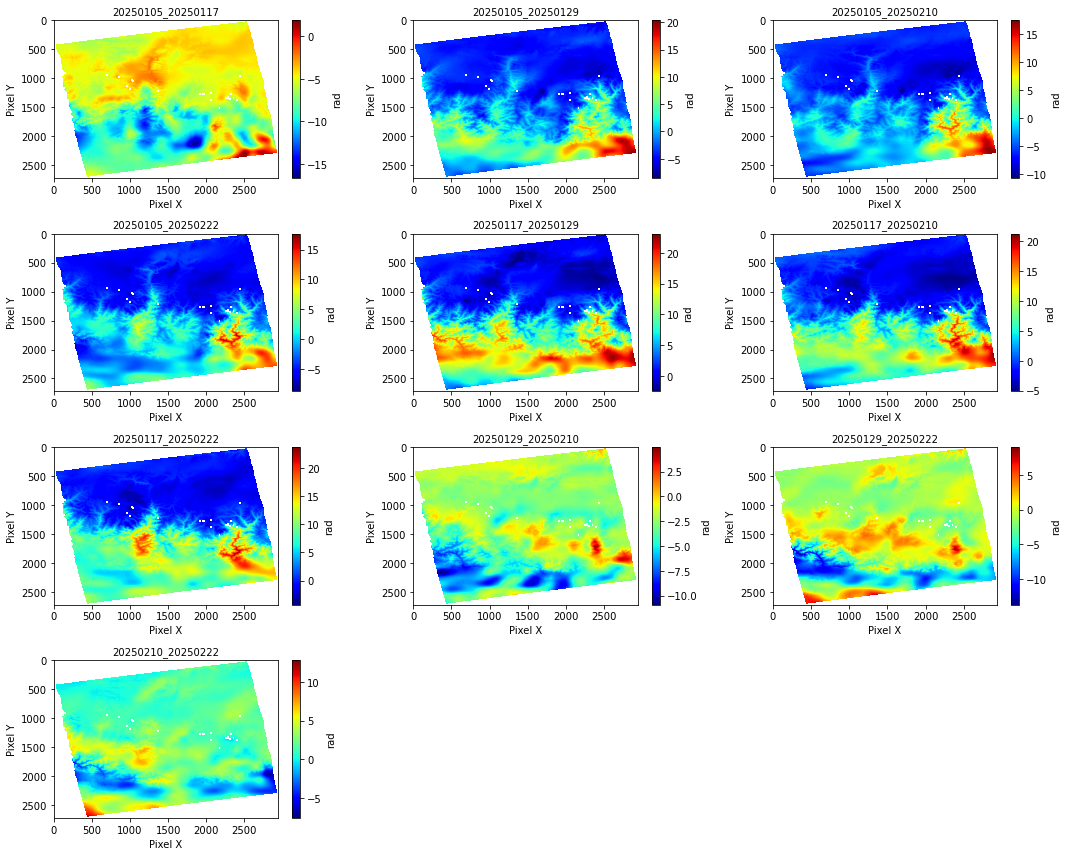

Saved all GACOS correction maps to GACOS_all_012A_06241_131313.png


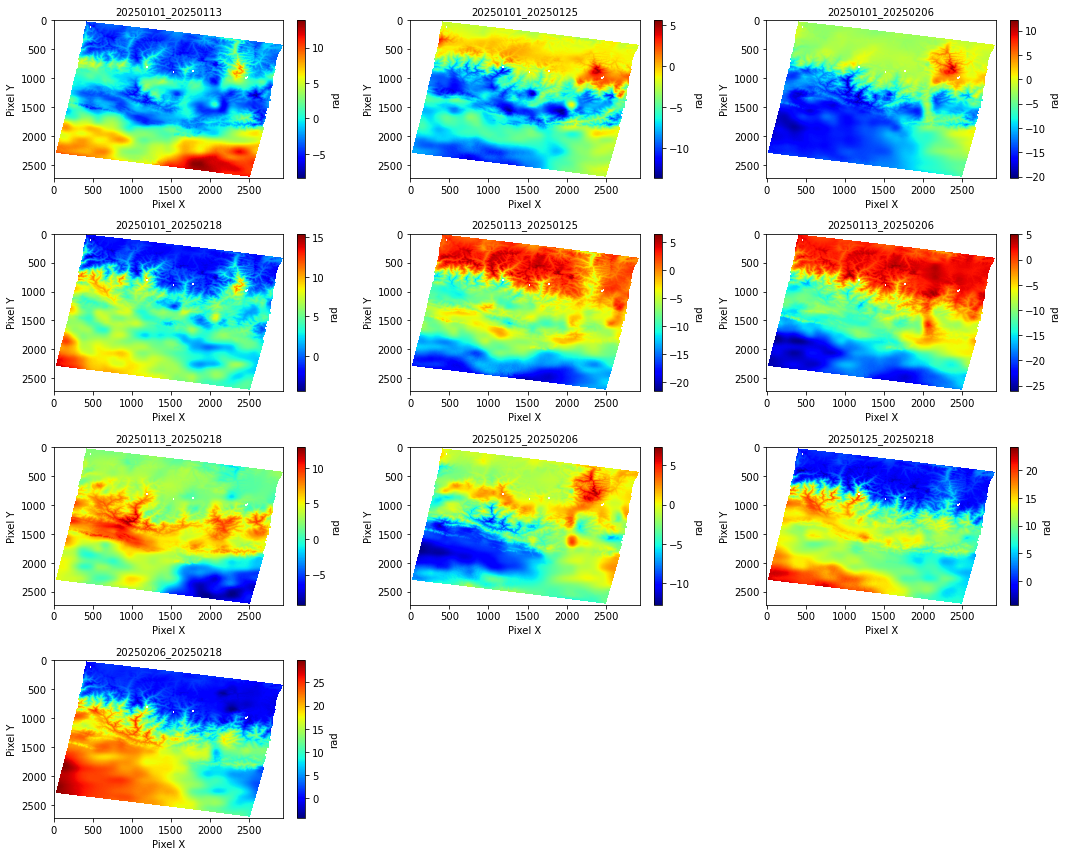

Saved all GACOS correction maps to GACOS_all_121D_06267_131313.png


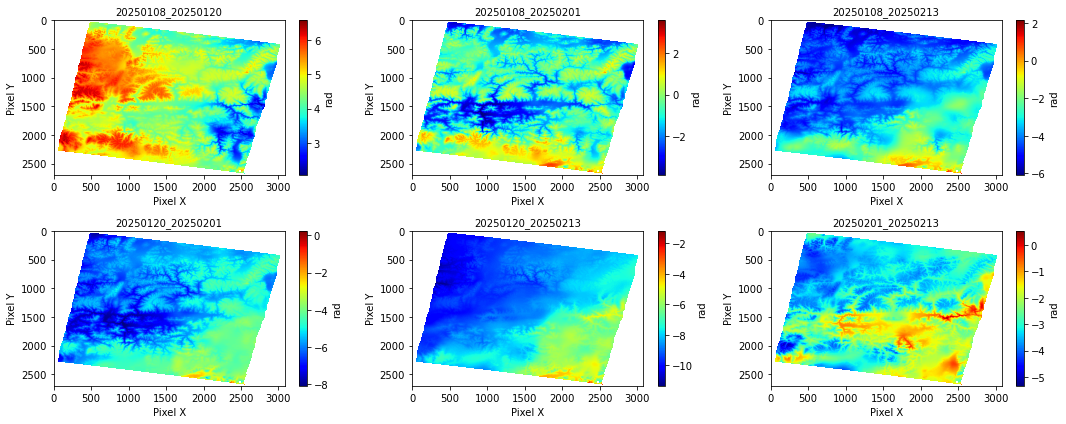

Saved all GACOS correction maps to GACOS_all_048D_06052_131313.png


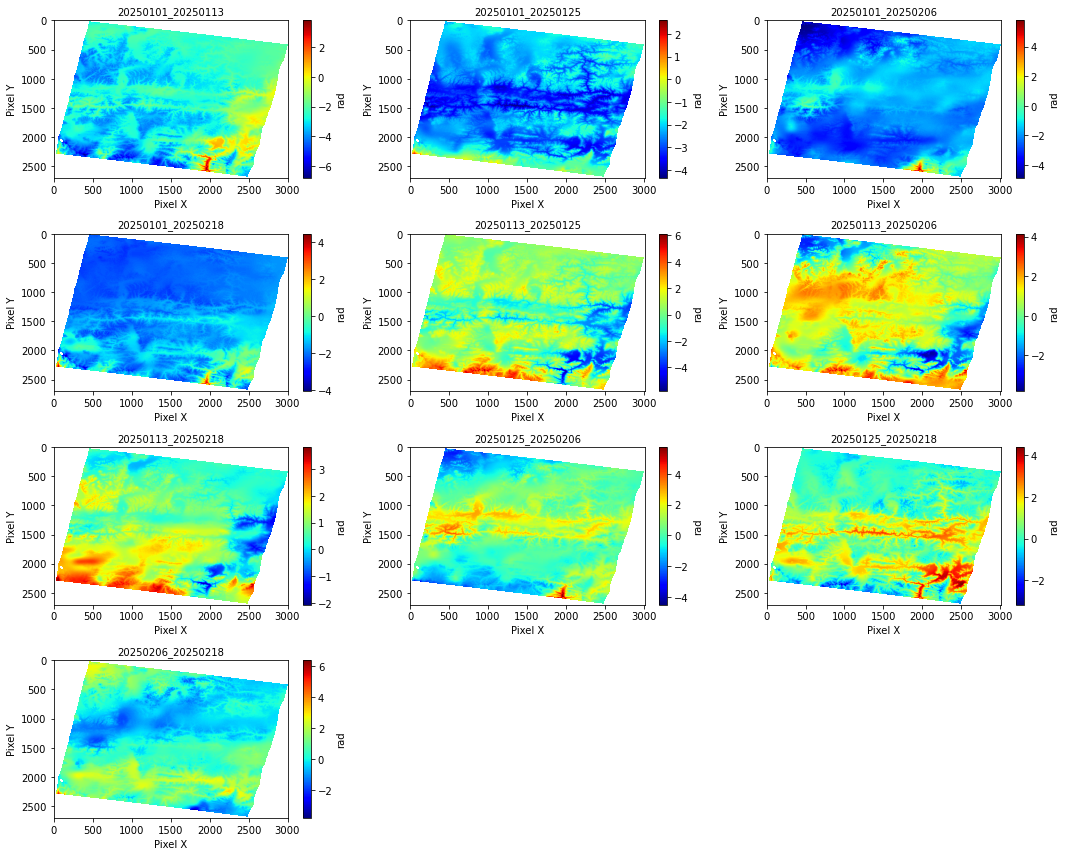

Saved all GACOS correction maps to GACOS_all_121D_06067_131313.png


In [27]:
import os
import rioxarray as r
import numpy as np
import matplotlib.pyplot as plt

# Loop through all items in the current directory
for frame in os.listdir(os.getcwd()):
    if frame[0].isdigit():  # Check if the first character is a number
        ifg_list=[]
        for ifgs in os.listdir(os.path.join(frame, 'GEOC')):
            if ifgs.startswith('202'):
                ifg_list.append(ifgs)
        
        # Extract track from frame
        track = int(frame[0:3])  # Convert first 3 digits to integer
        
        # Define paths
        LiCSAR_public = "/gws/nopw/j04/nceo_geohazards_vol1/public/LiCSAR_products"
        indir = f"{LiCSAR_public}/{track}/{frame}/interferograms"
        epochdir = f"{LiCSAR_public}/{track}/{frame}/epochs"
        
        # Set up the figure for multiple subplots
        num_plots = len(ifg_list)
        cols = 3  # Set number of columns (adjust as needed)
        rows = (num_plots + cols - 1) // cols  # Compute rows based on number of interferograms
        
        fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))  # Create subplot grid
        axes = axes.flatten()  # Flatten axes to simplify indexing
        
        # Loop over interferograms and visualize correction difference (dt)
        for idx, ifg in enumerate(ifg_list):
            date1, date2 = ifg.split("_")  # Extract date pairs
        
            # Define file paths
            infile = f"{indir}/{ifg}/{ifg}.geo.{ext}.tif"
            gacos1 = f"{epochdir}/{date1}/{date1}.sltd.geo.tif"
            gacos2 = f"{epochdir}/{date2}/{date2}.sltd.geo.tif"
        
            # Check if files exist
            if not (os.path.exists(infile) and os.path.exists(gacos1) and os.path.exists(gacos2)):
                print(f"Skipping {ifg}: One or more files missing.")
                continue
        
            # Load interferogram and GACOS correction files
            try:
                i = r.open_rasterio(infile).squeeze()
                t1 = r.open_rasterio(gacos1).squeeze()
                t2 = r.open_rasterio(gacos2).squeeze()
            except Exception as e:
                print(f"Error loading {ifg}: {e}")
                continue
        
            # Compute correction (dt)
            dt = t2 - t1
        
            # Plot correction on the assigned subplot
            im = axes[idx].imshow(dt, cmap="jet", aspect="auto")
            axes[idx].set_title(f"{ifg}", fontsize=10)
            axes[idx].set_xlabel("Pixel X")
            axes[idx].set_ylabel("Pixel Y")
            fig.colorbar(im, ax=axes[idx], label="rad")
        
        # Hide empty subplots if there are fewer than `rows * cols`
        for ax in axes[num_plots:]:
            ax.axis("off")
        
        # Adjust layout and save the combined plot
        plt.tight_layout()
        plt.savefig(f'GACOS_all_{frame}.png', dpi=300)
        plt.show()
        
        print(f"Saved all GACOS correction maps to GACOS_all_{frame}.png")

In [26]:
import os
import rioxarray as r
import numpy as np
import matplotlib.pyplot as plt

# Define interferogram extension
ext = "unw"  # Change this to "diff_pha" if needed

# Loop through all frame directories in the current folder
for frame in os.listdir(os.getcwd()):
    if frame[0].isdigit():  # Check if the first character is a number
        ifg_list = sorted([ifgs for ifgs in os.listdir(os.path.join(frame, 'GEOC')) if ifgs.startswith('202')])

        # Extract track from frame
        track = int(frame[0:3])  # Convert first 3 digits to integer

        # Define paths
        LiCSAR_public = "/gws/nopw/j04/nceo_geohazards_vol1/public/LiCSAR_products"
        indir = f"{LiCSAR_public}/{track}/{frame}/interferograms"
        epochdir = f"{LiCSAR_public}/{track}/{frame}/epochs"

        # Loop over interferograms and visualize correction difference (dt)
        for ifg in ifg_list:
            date1, date2 = ifg.split("_")  # Extract date pairs

            # Define file paths
            infile = f"{indir}/{ifg}/{ifg}.geo.{ext}.tif"
            gacos1 = f"{epochdir}/{date1}/{date1}.sltd.geo.tif"
            gacos2 = f"{epochdir}/{date2}/{date2}.sltd.geo.tif"

            # Check if files exist
            if not (os.path.exists(infile) and os.path.exists(gacos1) and os.path.exists(gacos2)):
                print(f"Skipping {ifg}: One or more files missing.")
                continue

            # Load interferogram and GACOS correction files
            try:
                i = r.open_rasterio(infile).squeeze()
                t1 = r.open_rasterio(gacos1).squeeze()
                t2 = r.open_rasterio(gacos2).squeeze()
            except Exception as e:
                print(f"Error loading {ifg}: {e}")
                continue

            # Convert zeros to NaN
            i = i.where(i != 0, np.nan)  # Set all zeros to NaN
            
            # Compute correction (t1 - t2)
            dt = t2 - t1
            # Apply correction to interferogram
            i_corrected = i - dt

            # Create figure for this specific interferogram
            fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

            # Plot Unwrapped Interferogram (unw)
            im1 = axes[0].imshow(i, cmap="bwr", aspect="auto")
            axes[0].set_title(f"{ifg} - Unwrapped", fontsize=10)
            axes[0].set_xlabel("Pixel X")
            axes[0].set_ylabel("Pixel Y")
            fig.colorbar(im1, ax=axes[0], label="rad")

            # Plot GACOS Correction (dt)
            im2 = axes[1].imshow(dt, cmap="jet", aspect="auto")
            axes[1].set_title(f"{ifg} - GACOS Correction", fontsize=10)
            axes[1].set_xlabel("Pixel X")
            axes[1].set_ylabel("Pixel Y")
            fig.colorbar(im2, ax=axes[1], label="rad")

            # Plot Corrected Interferogram (i_corrected)
            im3 = axes[2].imshow(i_corrected, cmap="bwr", aspect="auto")
            axes[2].set_title(f"{ifg} - Corrected", fontsize=10)
            axes[2].set_xlabel("Pixel X")
            axes[2].set_ylabel("Pixel Y")
            fig.colorbar(im3, ax=axes[2], label="rad")

            # Adjust layout and save the plot as a separate PNG
            plt.tight_layout()
            plt.savefig(f'GACOS_{frame}_{ifg}.png', dpi=300)
            plt.close()  # Close figure to free memory

            print(f"GACOS correction map: GACOS_{frame}_{ifg}.png")


Saved GACOS correction map: GACOS_048D_06252_131313_20250108_20250120.png
Saved GACOS correction map: GACOS_048D_06252_131313_20250108_20250201.png
Saved GACOS correction map: GACOS_048D_06252_131313_20250108_20250213.png
Saved GACOS correction map: GACOS_048D_06252_131313_20250120_20250201.png
Saved GACOS correction map: GACOS_048D_06252_131313_20250120_20250213.png
Saved GACOS correction map: GACOS_048D_06252_131313_20250201_20250213.png
Saved GACOS correction map: GACOS_012A_06041_131313_20250105_20250117.png
Saved GACOS correction map: GACOS_012A_06041_131313_20250105_20250129.png
Saved GACOS correction map: GACOS_012A_06041_131313_20250105_20250210.png
Saved GACOS correction map: GACOS_012A_06041_131313_20250105_20250222.png
Saved GACOS correction map: GACOS_012A_06041_131313_20250117_20250129.png
Saved GACOS correction map: GACOS_012A_06041_131313_20250117_20250210.png
Saved GACOS correction map: GACOS_012A_06041_131313_20250117_20250222.png
Saved GACOS correction map: GACOS_012A

/tmp/ipykernel_777/3741675598.py:71: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  im3 = axes[2].imshow(i_corrected, cmap="bwr", aspect="auto")
/tmp/ipykernel_777/3741675598.py:71: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  im3 = axes[2].imshow(i_corrected, cmap="bwr", aspect="auto")


Saved GACOS correction map: GACOS_012A_06241_131313_20250117_20250222.png
Saved GACOS correction map: GACOS_012A_06241_131313_20250129_20250210.png
Saved GACOS correction map: GACOS_012A_06241_131313_20250129_20250222.png


/tmp/ipykernel_777/3741675598.py:71: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  im3 = axes[2].imshow(i_corrected, cmap="bwr", aspect="auto")
/tmp/ipykernel_777/3741675598.py:71: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  im3 = axes[2].imshow(i_corrected, cmap="bwr", aspect="auto")


Saved GACOS correction map: GACOS_012A_06241_131313_20250210_20250222.png


/tmp/ipykernel_777/3741675598.py:71: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  im3 = axes[2].imshow(i_corrected, cmap="bwr", aspect="auto")


Saved GACOS correction map: GACOS_121D_06267_131313_20250101_20250113.png


/tmp/ipykernel_777/3741675598.py:71: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  im3 = axes[2].imshow(i_corrected, cmap="bwr", aspect="auto")


Saved GACOS correction map: GACOS_121D_06267_131313_20250101_20250125.png


/tmp/ipykernel_777/3741675598.py:71: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  im3 = axes[2].imshow(i_corrected, cmap="bwr", aspect="auto")


Saved GACOS correction map: GACOS_121D_06267_131313_20250101_20250206.png


/tmp/ipykernel_777/3741675598.py:71: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  im3 = axes[2].imshow(i_corrected, cmap="bwr", aspect="auto")


Saved GACOS correction map: GACOS_121D_06267_131313_20250101_20250218.png


/tmp/ipykernel_777/3741675598.py:71: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  im3 = axes[2].imshow(i_corrected, cmap="bwr", aspect="auto")


Saved GACOS correction map: GACOS_121D_06267_131313_20250113_20250125.png


/tmp/ipykernel_777/3741675598.py:71: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  im3 = axes[2].imshow(i_corrected, cmap="bwr", aspect="auto")


Saved GACOS correction map: GACOS_121D_06267_131313_20250113_20250206.png


/tmp/ipykernel_777/3741675598.py:71: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  im3 = axes[2].imshow(i_corrected, cmap="bwr", aspect="auto")


Saved GACOS correction map: GACOS_121D_06267_131313_20250113_20250218.png


/tmp/ipykernel_777/3741675598.py:71: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  im3 = axes[2].imshow(i_corrected, cmap="bwr", aspect="auto")


Saved GACOS correction map: GACOS_121D_06267_131313_20250125_20250206.png


/tmp/ipykernel_777/3741675598.py:71: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  im3 = axes[2].imshow(i_corrected, cmap="bwr", aspect="auto")


Saved GACOS correction map: GACOS_121D_06267_131313_20250125_20250218.png


/tmp/ipykernel_777/3741675598.py:71: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  im3 = axes[2].imshow(i_corrected, cmap="bwr", aspect="auto")


Saved GACOS correction map: GACOS_121D_06267_131313_20250206_20250218.png
Saved GACOS correction map: GACOS_048D_06052_131313_20250108_20250120.png
Saved GACOS correction map: GACOS_048D_06052_131313_20250108_20250201.png
Saved GACOS correction map: GACOS_048D_06052_131313_20250108_20250213.png
Saved GACOS correction map: GACOS_048D_06052_131313_20250120_20250201.png
Saved GACOS correction map: GACOS_048D_06052_131313_20250120_20250213.png
Saved GACOS correction map: GACOS_048D_06052_131313_20250201_20250213.png
Saved GACOS correction map: GACOS_121D_06067_131313_20250101_20250113.png
Saved GACOS correction map: GACOS_121D_06067_131313_20250101_20250125.png
Saved GACOS correction map: GACOS_121D_06067_131313_20250101_20250206.png
Saved GACOS correction map: GACOS_121D_06067_131313_20250101_20250218.png
Saved GACOS correction map: GACOS_121D_06067_131313_20250113_20250125.png
Saved GACOS correction map: GACOS_121D_06067_131313_20250113_20250206.png
Saved GACOS correction map: GACOS_121D